# logistic regression 
absentisieem

In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
import statsmodels.api as sms
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#import our data by pandas
raw_data=pd.read_csv("D:\\tala\\Absenteeism_data.csv")
raw_data

ID  Reason for Absence       Date  Transportation Expense  \
0    11                  26   7/7/2018                     289   
1    36                   0  7/14/2018                     118   
2     3                  23  7/15/2018                     179   
3     7                   7  7/16/2018                     279   
4    11                  23  7/23/2018                     289   
..   ..                 ...        ...                     ...   
695  17                  10  5/23/2021                     179   
696  28                   6  5/23/2021                     225   
697  18                  10  5/24/2021                     330   
698  25                  23  5/24/2021                     235   
699  15                  28  5/31/2021                     291   

     Distance to Work  Age  Daily Work Load Average(in Minutes)   \
0                  36   33                               239.554   
1                  13   50                               239.554   
2                  51   38                               239.554   
3                   5   39                               239.554   
4                  36   33                               239.554   
..                ...  ...                                   ...   
695                22   40                               237.656   
696                26   28                               237.656   
697                16   28                               237.656   
698                16   32                               237.656   
699                31   40                               237.656   

     Body Mass Index  Education  Children  Pets  Absenteeism Time in Hours  
0                 30          1         2     1                          4  
1                 31          1         1     0                          0  
2                 31          1         0     0                          2  
3                 24          1         2     0                          4  
4                 30          1         2     1                          2  
..               ...        ...       ...   ...                        ...  
695               22          2         2     0                          8  
696               24          1         1     2                          3  
697               25          2         0     0                          8  
698               25          3         0     0                          2  
699               25          1         1     1                          2  

[700 rows x 12 columns]

In [3]:
#getting som information about dataset by pandas
#700 rows or records and 12 columns
#type of our data in each columns or features are so important
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    700 non-null    int64  
 1   Reason for Absence                    700 non-null    int64  
 2   Date                                  700 non-null    object 
 3   Transportation Expense                700 non-null    int64  
 4   Distance to Work                      700 non-null    int64  
 5   Age                                   700 non-null    int64  
 6   Daily Work Load Average(in Minutes)   700 non-null    float64
 7   Body Mass Index                       700 non-null    int64  
 8   Education                             700 non-null    int64  
 9   Children                              700 non-null    int64  
 10  Pets                                  700 non-null    int64  
 11  Absenteeism Time in

In [4]:
#gettint descriptive statistical information of our columns
raw_data.describe()

ID  Reason for Absence  Transportation Expense  \
count  700.000000          700.000000              700.000000   
mean    17.951429           19.411429              222.347143   
std     11.028144            8.356292               66.312960   
min      1.000000            0.000000              118.000000   
25%      9.000000           13.000000              179.000000   
50%     18.000000           23.000000              225.000000   
75%     28.000000           27.000000              260.000000   
max     36.000000           28.000000              388.000000   

       Distance to Work         Age  Daily Work Load Average(in Minutes)   \
count        700.000000  700.000000                            700.000000   
mean          29.892857   36.417143                            271.801774   
std           14.804446    6.379083                             40.021804   
min            5.000000   27.000000                            205.917000   
25%           16.000000   31.000000                            241.476000   
50%           26.000000   37.000000                            264.249000   
75%           50.000000   40.000000                            294.217000   
max           52.000000   58.000000                            378.884000   

       Body Mass Index   Education    Children        Pets  \
count       700.000000  700.000000  700.000000  700.000000   
mean         26.737143    1.282857    1.021429    0.687143   
std           4.254701    0.668090    1.112215    1.166095   
min          19.000000    1.000000    0.000000    0.000000   
25%          24.000000    1.000000    0.000000    0.000000   
50%          25.000000    1.000000    1.000000    0.000000   
75%          31.000000    1.000000    2.000000    1.000000   
max          38.000000    4.000000    4.000000    8.000000   

       Absenteeism Time in Hours  
count                 700.000000  
mean                    6.761429  
std                    12.670082  
min                     0.000000  
25%                     2.000000  
50%                     3.000000  
75%                     8.000000  
max                   120.000000

In [5]:
raw_data_1=raw_data.copy()

In [6]:
#code for showing whole data of our dataset 
pd.options.display.max_columns=None
pd.options.display.max_rows=None
display(raw_data_1)

ID  Reason for Absence        Date  Transportation Expense  \
0    11                  26    7/7/2018                     289   
1    36                   0   7/14/2018                     118   
2     3                  23   7/15/2018                     179   
3     7                   7   7/16/2018                     279   
4    11                  23   7/23/2018                     289   
5     3                  23   7/10/2018                     179   
6    10                  22   7/17/2018                     361   
7    20                  23   7/24/2018                     260   
8    14                  19    7/6/2018                     155   
9     1                  22   7/13/2018                     235   
10   20                   1   7/20/2018                     260   
11   20                   1   7/14/2018                     260   
12   20                  11   7/15/2018                     260   
13    3                  11   7/15/2018                     179   
14    3                  23   7/15/2018                     179   
15   24                  14   7/17/2018                     246   
16    3                  23   7/17/2018                     179   
17    3                  21   7/27/2018                     179   
18    6                  11   7/30/2018                     189   
19   33                  23    8/5/2018                     248   
20   18                  10   8/12/2018                     330   
21    3                  11    8/3/2018                     179   
22   10                  13   8/10/2018                     361   
23   20                  28   8/14/2018                     260   
24   11                  18   8/17/2018                     289   
25   10                  25   8/24/2018                     361   
26   11                  23    8/4/2018                     289   
27   30                  28   8/12/2018                     157   
28   11                  18   8/19/2018                     289   
29    3                  23   8/28/2018                     179   
30    3                  18   8/17/2018                     179   
31    2                  18   8/27/2018                     235   
32    1                  23   8/27/2018                     235   
33    2                  18   8/17/2018                     235   
34    3                  23   8/17/2018                     179   
35   10                  23   8/17/2018                     361   
36   11                  24    8/4/2018                     289   
37   19                  11   8/20/2018                     291   
38    2                  28   8/21/2018                     235   
39   20                  23   8/28/2018                     260   
40   27                  23    9/1/2018                     184   
41   34                  23    9/7/2018                     118   
42    3                  23    9/1/2018                     179   
43    5                  19    9/8/2018                     235   
44   14                  23    9/9/2018                     155   
45   34                  23   9/13/2018                     118   
46    3                  23   9/14/2018                     179   
47   15                  23   9/24/2018                     291   
48   20                  22    9/4/2018                     260   
49   15                  14   9/14/2018                     291   
50   20                   0   9/21/2018                     260   
51   29                   0   9/28/2018                     225   
52   28                  23    9/8/2018                     225   
53   34                  23   9/15/2018                     118   
54   11                   0   9/22/2018                     289   
55   36                   0   9/29/2018                     118   
56   28                  18   9/16/2018                     225   
57    3                  23   9/23/2018                     179   
58   13                   0   9/30/2018             

In [7]:
#drop the id column beacause we dont need them 
raw_data_1=raw_data_1.drop(["ID"] , axis=1)
raw_data_1

Reason for Absence        Date  Transportation Expense  Distance to Work  \
0                    26    7/7/2018                     289                36   
1                     0   7/14/2018                     118                13   
2                    23   7/15/2018                     179                51   
3                     7   7/16/2018                     279                 5   
4                    23   7/23/2018                     289                36   
5                    23   7/10/2018                     179                51   
6                    22   7/17/2018                     361                52   
7                    23   7/24/2018                     260                50   
8                    19    7/6/2018                     155                12   
9                    22   7/13/2018                     235                11   
10                    1   7/20/2018                     260                50   
11                    1   7/14/2018                     260                50   
12                   11   7/15/2018                     260                50   
13                   11   7/15/2018                     179                51   
14                   23   7/15/2018                     179                51   
15                   14   7/17/2018                     246                25   
16                   23   7/17/2018                     179                51   
17                   21   7/27/2018                     179                51   
18                   11   7/30/2018                     189                29   
19                   23    8/5/2018                     248                25   
20                   10   8/12/2018                     330                16   
21                   11    8/3/2018                     179                51   
22                   13   8/10/2018                     361                52   
23                   28   8/14/2018                     260                50   
24                   18   8/17/2018                     289                36   
25                   25   8/24/2018                     361                52   
26                   23    8/4/2018                     289                36   
27                   28   8/12/2018                     157                27   
28                   18   8/19/2018                     289                36   
29                   23   8/28/2018                     179                51   
30                   18   8/17/2018                     179                51   
31                   18   8/27/2018                     235                29   
32                   23   8/27/2018                     235                11   
33                   18   8/17/2018                     235                29   
34                   23   8/17/2018                     179                51   
35                   23   8/17/2018                     361                52   
36                   24    8/4/2018                     289                36   
37                   11   8/20/2018                     291                50   
38                   28   8/21/2018                     235                29   
39                   23   8/28/2018                     260                50   
40                   23    9/1/2018                     184                42   
41                   23    9/7/2018                     118                10   
42                   23    9/1/2018                     179                51   
43                   19    9/8/2018                     235                20   
44                   23    9/9/2018                     155                12   
45                   23   9/13/2018                     118                10   
46                   23   9/14/2018                     179                51   
47                   23   9/24/2018                     291                31   
48                   22    9/4/2018 

analyzig the columns

In [8]:
raw_data_1["Reason for Absence"]

0      26
1       0
2      23
3       7
4      23
5      23
6      22
7      23
8      19
9      22
10      1
11      1
12     11
13     11
14     23
15     14
16     23
17     21
18     11
19     23
20     10
21     11
22     13
23     28
24     18
25     25
26     23
27     28
28     18
29     23
30     18
31     18
32     23
33     18
34     23
35     23
36     24
37     11
38     28
39     23
40     23
41     23
42     23
43     19
44     23
45     23
46     23
47     23
48     22
49     14
50      0
51      0
52     23
53     23
54      0
55      0
56     18
57     23
58      0
59     23
60     23
61     23
62     23
63     23
64      0
65     23
66     23
67     23
68     23
69     23
70     23
71     23
72     23
73     23
74     19
75     14
76     28
77     26
78     23
79     28
80     23
81     23
82     13
83     21
84     23
85     10
86     22
87     14
88     23
89      6
90     23
91     21
92     13
93     28
94     28
95     28
96      7
97     23
98     23
99     19


In [9]:
#min and max amount of our reason for absence
raw_data_1["Reason for Absence"].min()  ,raw_data_1["Reason for Absence"].max()

(0, 28)

In [10]:
#uniqe amonth of this column by pandas
pd.unique(raw_data_1["Reason for Absence"])
#raw_data_1["Reason for Absence"].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [11]:
#amount of values
len(raw_data_1["Reason for Absence"].unique())

28

In [12]:
#sorting amounts
sorted(raw_data_1["Reason for Absence"].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [13]:
#making dummy by (reson for absence)column
reason_absent=pd.get_dummies(raw_data_1["Reason for Absence"])
reason_absent

0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3     0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
4     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
6     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
7     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
8     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
9     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
10    0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
11    0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
12    0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
13    0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
14    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
15    0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   
16    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
17    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
18    0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
19    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
20    0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
21    0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
22    0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   
23    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
24    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
25    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
26    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
27    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
28    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
29    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
30    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
31    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
32    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
33    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
34    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
35    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
36    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
37    0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
38    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
39    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
40    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
41    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
42    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
43    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
44    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
45    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
46    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
47    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
48    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
49    0   0   0   0   0   0   0   0   0   0   0   0   0

In [14]:
#making a column for classify the reason 
reason_absent["check"]=reason_absent.sum(axis=1)
reason_absent

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  21  \
0    0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
1    1  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
2    0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
3    0  0  0  0  0  0  0  1  0  0   0   0   0   0   0   0   0   0   0   0   0   
4    0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
5    0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
6    0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
7    0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
8    0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   1   0   
9    0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
10   0  1  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
11   0  1  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
12   0  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   0   0   0   0   0   
13   0  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   0   0   0   0   0   
14   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
15   0  0  0  0  0  0  0  0  0  0   0   0   0   0   1   0   0   0   0   0   0   
16   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
17   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   1   
18   0  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   0   0   0   0   0   
19   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
20   0  0  0  0  0  0  0  0  0  0   1   0   0   0   0   0   0   0   0   0   0   
21   0  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   0   0   0   0   0   
22   0  0  0  0  0  0  0  0  0  0   0   0   0   1   0   0   0   0   0   0   0   
23   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
24   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   1   0   0   
25   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
26   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
27   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
28   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   1   0   0   
29   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
30   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   1   0   0   
31   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   1   0   0   
32   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
33   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   1   0   0   
34   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
35   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
36   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
37   0  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   0   0   0   0   0   
38   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
39   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
40   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
41   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
42   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
43   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   1   0   
44   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
45   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
46   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
47   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
48   0  0  0  0  0  0  0  0  0  0   

In [15]:
reason_absent["check"].sum(axis=0)

700

In [16]:
reason_absent=reason_absent.drop(["check"] , axis=1)

In [17]:
raw_data_1.columns.values

array(['Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average(in Minutes) ',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours'], dtype=object)

In [18]:
reason_absent.columns.values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 21, 22, 23, 24, 25, 26, 27, 28], dtype=object)

In [19]:
raw_data_1=raw_data_1.drop(["Reason for Absence"] , axis=1)

In [20]:
#splitting one data frame to 4 dataframes
reason_1=reason_absent.loc[: , :14].max(axis=1)
reason_2=reason_absent.loc[: , 15:17].max(axis=1)
reason_3=reason_absent.loc[: , 18:22].max(axis=1)
reason_4=reason_absent.loc[: , 23:].max(axis=1)

In [21]:
df=raw_data_1.copy()

In [22]:
#combining five dataframes by pandas
df=pd.concat([df ,reason_1 , reason_2 , reason_3 , reason_4 ] , axis=1)
df

Date  Transportation Expense  Distance to Work  Age  \
0      7/7/2018                     289                36   33   
1     7/14/2018                     118                13   50   
2     7/15/2018                     179                51   38   
3     7/16/2018                     279                 5   39   
4     7/23/2018                     289                36   33   
5     7/10/2018                     179                51   38   
6     7/17/2018                     361                52   28   
7     7/24/2018                     260                50   36   
8      7/6/2018                     155                12   34   
9     7/13/2018                     235                11   37   
10    7/20/2018                     260                50   36   
11    7/14/2018                     260                50   36   
12    7/15/2018                     260                50   36   
13    7/15/2018                     179                51   38   
14    7/15/2018                     179                51   38   
15    7/17/2018                     246                25   41   
16    7/17/2018                     179                51   38   
17    7/27/2018                     179                51   38   
18    7/30/2018                     189                29   33   
19     8/5/2018                     248                25   47   
20    8/12/2018                     330                16   28   
21     8/3/2018                     179                51   38   
22    8/10/2018                     361                52   28   
23    8/14/2018                     260                50   36   
24    8/17/2018                     289                36   33   
25    8/24/2018                     361                52   28   
26     8/4/2018                     289                36   33   
27    8/12/2018                     157                27   29   
28    8/19/2018                     289                36   33   
29    8/28/2018                     179                51   38   
30    8/17/2018                     179                51   38   
31    8/27/2018                     235                29   48   
32    8/27/2018                     235                11   37   
33    8/17/2018                     235                29   48   
34    8/17/2018                     179                51   38   
35    8/17/2018                     361                52   28   
36     8/4/2018                     289                36   33   
37    8/20/2018                     291                50   32   
38    8/21/2018                     235                29   48   
39    8/28/2018                     260                50   36   
40     9/1/2018                     184                42   27   
41     9/7/2018                     118                10   37   
42     9/1/2018                     179                51   38   
43     9/8/2018                     235                20   43   
44     9/9/2018                     155                12   34   
45    9/13/2018                     118                10   37   
46    9/14/2018                     179                51   38   
47    9/24/2018                     291                31   40   
48     9/4/2018                     260                50   36   
49    9/14/2018                     291                31   40   
50    9/21/2018                     260                50   36   
51    9/28/2018                     225                26   28   
52     9/8/2018                     225                26   28   
53    9/15/2018                     118                10   37   
54    9/22/2018                     289                36   33   
55    9/29/2018                     118                13   50   
56    9/16/2018                     225                26   28   
57    9/23/2018                     179                51   38   
58    9/30/2018                     369                17   31   
59    9/11/2018                     248            

In [23]:
df.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average(in Minutes) ', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours', 0, 1,
       2, 3], dtype=object)

In [24]:
#rename the columns
new_columns=['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average(in Minutes) ', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours', 'reason1', 'reason2',
       'reason3', 'reason4']

In [25]:
df.columns=new_columns
df.head()

Date  Transportation Expense  Distance to Work  Age  \
0   7/7/2018                     289                36   33   
1  7/14/2018                     118                13   50   
2  7/15/2018                     179                51   38   
3  7/16/2018                     279                 5   39   
4  7/23/2018                     289                36   33   

   Daily Work Load Average(in Minutes)   Body Mass Index  Education  Children  \
0                               239.554               30          1         2   
1                               239.554               31          1         1   
2                               239.554               31          1         0   
3                               239.554               24          1         2   
4                               239.554               30          1         2   

   Pets  Absenteeism Time in Hours  reason1  reason2  reason3  reason4  
0     1                          4        0        0        0        1  
1     0                          0        1        0        0        0  
2     0                          2        0        0        0        1  
3     0                          4        1        0        0        0  
4     1                          2        0        0        0        1

In [26]:
reorder_columns=['reason1', 'reason2', 'reason3', 'reason4','Date', 'Transportation Expense', 'Distance to Work', 'Age',
'Daily Work Load Average(in Minutes) ', 'Body Mass Index','Education', 'Children', 'Pets', 'Absenteeism Time in Hours']

In [27]:
df=df[reorder_columns]
df.head()

reason1  reason2  reason3  reason4       Date  Transportation Expense  \
0        0        0        0        1   7/7/2018                     289   
1        1        0        0        0  7/14/2018                     118   
2        0        0        0        1  7/15/2018                     179   
3        1        0        0        0  7/16/2018                     279   
4        0        0        0        1  7/23/2018                     289   

   Distance to Work  Age  Daily Work Load Average(in Minutes)   \
0                36   33                               239.554   
1                13   50                               239.554   
2                51   38                               239.554   
3                 5   39                               239.554   
4                36   33                               239.554   

   Body Mass Index  Education  Children  Pets  Absenteeism Time in Hours  
0               30          1         2     1                          4  
1               31          1         1     0                          0  
2               31          1         0     0                          2  
3               24          1         2     0                          4  
4               30          1         2     1                          2

creating check point

In [28]:
df_modified_reason=df.copy()
df_modified_reason.head()

reason1  reason2  reason3  reason4       Date  Transportation Expense  \
0        0        0        0        1   7/7/2018                     289   
1        1        0        0        0  7/14/2018                     118   
2        0        0        0        1  7/15/2018                     179   
3        1        0        0        0  7/16/2018                     279   
4        0        0        0        1  7/23/2018                     289   

   Distance to Work  Age  Daily Work Load Average(in Minutes)   \
0                36   33                               239.554   
1                13   50                               239.554   
2                51   38                               239.554   
3                 5   39                               239.554   
4                36   33                               239.554   

   Body Mass Index  Education  Children  Pets  Absenteeism Time in Hours  
0               30          1         2     1                          4  
1               31          1         1     0                          0  
2               31          1         0     0                          2  
3               24          1         2     0                          4  
4               30          1         2     1                          2

dealing with Date column

In [29]:
#first of all we have to know the type of this column
type(df_modified_reason["Date"])

pandas.core.series.Series

In [30]:
#tgype of first member or first elemont of first row's of this column
type(df_modified_reason["Date"][0])

str

In [31]:
#we have to change the type of it to date  by pandas
(df_modified_reason["Date"])=pd.to_datetime(df_modified_reason["Date"])
(df_modified_reason["Date"]).head()

0   2018-07-07
1   2018-07-14
2   2018-07-15
3   2018-07-16
4   2018-07-23
Name: Date, dtype: datetime64[ns]

In [32]:
#extract day and month
type(df_modified_reason["Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [33]:
#shape of DF 
df_modified_reason.shape

(700, 14)

In [34]:
#number of rows
df_modified_reason.shape[0]

700

In [35]:
#number of columns
df_modified_reason.shape[1] 

14

In [36]:
df_modified_reason["Date"][0].month
list_months=[]
list_months
for i in range(df_modified_reason.shape[0]):  # instead of writting 700
    list_months.append(df_modified_reason["Date"][i].month)
    

In [37]:
len(list_months)

700

In [38]:
df_modified_reason["date_month"]=list_months
df_modified_reason.head()

reason1  reason2  reason3  reason4       Date  Transportation Expense  \
0        0        0        0        1 2018-07-07                     289   
1        1        0        0        0 2018-07-14                     118   
2        0        0        0        1 2018-07-15                     179   
3        1        0        0        0 2018-07-16                     279   
4        0        0        0        1 2018-07-23                     289   

   Distance to Work  Age  Daily Work Load Average(in Minutes)   \
0                36   33                               239.554   
1                13   50                               239.554   
2                51   38                               239.554   
3                 5   39                               239.554   
4                36   33                               239.554   

   Body Mass Index  Education  Children  Pets  Absenteeism Time in Hours  \
0               30          1         2     1                          4   
1               31          1         1     0                          0   
2               31          1         0     0                          2   
3               24          1         2     0                          4   
4               30          1         2     1                          2   

   date_month  
0           7  
1           7  
2           7  
3           7  
4           7

In [39]:
#for extracting the day from Date
#weekday refers to with day of week
df_modified_reason["Date"][699].weekday()
df_modified_reason["Date"][699]

Timestamp('2021-05-31 00:00:00')

In [40]:
def day_of_date(day_value):
    return day_value.weekday()

In [41]:
#code apply
df_modified_reason["date_day"]=df_modified_reason["Date"].apply(day_of_date)

In [42]:
df_modified_reason.head()

reason1  reason2  reason3  reason4       Date  Transportation Expense  \
0        0        0        0        1 2018-07-07                     289   
1        1        0        0        0 2018-07-14                     118   
2        0        0        0        1 2018-07-15                     179   
3        1        0        0        0 2018-07-16                     279   
4        0        0        0        1 2018-07-23                     289   

   Distance to Work  Age  Daily Work Load Average(in Minutes)   \
0                36   33                               239.554   
1                13   50                               239.554   
2                51   38                               239.554   
3                 5   39                               239.554   
4                36   33                               239.554   

   Body Mass Index  Education  Children  Pets  Absenteeism Time in Hours  \
0               30          1         2     1                          4   
1               31          1         1     0                          0   
2               31          1         0     0                          2   
3               24          1         2     0                          4   
4               30          1         2     1                          2   

   date_month  date_day  
0           7         5  
1           7         5  
2           7         6  
3           7         0  
4           7         0

drop the Date column


In [43]:
df_modified_reason=df_modified_reason.drop(["Date"], axis=1) 

In [44]:
df_modified_reason.head()

reason1  reason2  reason3  reason4  Transportation Expense  \
0        0        0        0        1                     289   
1        1        0        0        0                     118   
2        0        0        0        1                     179   
3        1        0        0        0                     279   
4        0        0        0        1                     289   

   Distance to Work  Age  Daily Work Load Average(in Minutes)   \
0                36   33                               239.554   
1                13   50                               239.554   
2                51   38                               239.554   
3                 5   39                               239.554   
4                36   33                               239.554   

   Body Mass Index  Education  Children  Pets  Absenteeism Time in Hours  \
0               30          1         2     1                          4   
1               31          1         1     0                          0   
2               31          1         0     0                          2   
3               24          1         2     0                          4   
4               30          1         2     1                          2   

   date_month  date_day  
0           7         5  
1           7         5  
2           7         6  
3           7         0  
4           7         0

In [45]:
df_modified_reason.columns.values

array(['reason1', 'reason2', 'reason3', 'reason4',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average(in Minutes) ', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours',
       'date_month', 'date_day'], dtype=object)

In [46]:
new_column_order=['reason1', 'reason2', 'reason3', 'reason4', 'date_month', 'date_day', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average(in Minutes) ', 'Body Mass Index', 'Education', 'Children', 'Pets', 'Absenteeism Time in Hours']

In [47]:
df_modified_reason=df_modified_reason[new_column_order]
df_modified_reason.head()

reason1  reason2  reason3  reason4  date_month  date_day  \
0        0        0        0        1           7         5   
1        1        0        0        0           7         5   
2        0        0        0        1           7         6   
3        1        0        0        0           7         0   
4        0        0        0        1           7         0   

   Transportation Expense  Distance to Work  Age  \
0                     289                36   33   
1                     118                13   50   
2                     179                51   38   
3                     279                 5   39   
4                     289                36   33   

   Daily Work Load Average(in Minutes)   Body Mass Index  Education  Children  \
0                               239.554               30          1         2   
1                               239.554               31          1         1   
2                               239.554               31          1         0   
3                               239.554               24          1         2   
4                               239.554               30          1         2   

   Pets  Absenteeism Time in Hours  
0     1                          4  
1     0                          0  
2     0                          2  
3     0                          4  
4     1                          2

check point

In [48]:
new_date_modified=df_modified_reason.copy()
new_date_modified.head()

reason1  reason2  reason3  reason4  date_month  date_day  \
0        0        0        0        1           7         5   
1        1        0        0        0           7         5   
2        0        0        0        1           7         6   
3        1        0        0        0           7         0   
4        0        0        0        1           7         0   

   Transportation Expense  Distance to Work  Age  \
0                     289                36   33   
1                     118                13   50   
2                     179                51   38   
3                     279                 5   39   
4                     289                36   33   

   Daily Work Load Average(in Minutes)   Body Mass Index  Education  Children  \
0                               239.554               30          1         2   
1                               239.554               31          1         1   
2                               239.554               31          1         0   
3                               239.554               24          1         2   
4                               239.554               30          1         2   

   Pets  Absenteeism Time in Hours  
0     1                          4  
1     0                          0  
2     0                          2  
3     0                          4  
4     1                          2

# next columns

dealing with Transportation Expense

In [49]:
type(new_date_modified["Transportation Expense"])

pandas.core.series.Series

In [50]:
type(new_date_modified["Transportation Expense"][0])

numpy.int64

<AxesSubplot:xlabel='Transportation Expense', ylabel='Density'>

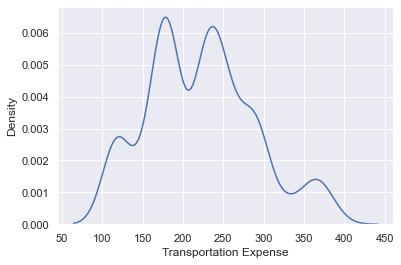

In [51]:
sns.kdeplot(new_date_modified["Transportation Expense"])

dealing with Distance to Work

In [52]:
type(new_date_modified["Distance to Work"])

pandas.core.series.Series

In [53]:
type(new_date_modified["Distance to Work"][0])

numpy.int64

<AxesSubplot:xlabel='Distance to Work', ylabel='Density'>

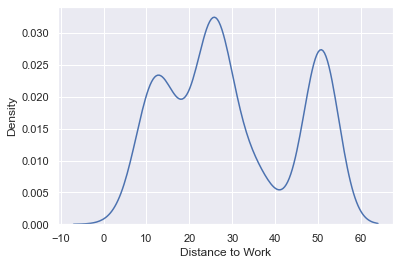

In [54]:
sns.kdeplot(new_date_modified["Distance to Work"])

dealing with Age

In [55]:
type(new_date_modified["Age"])

pandas.core.series.Series

In [56]:
type(new_date_modified["Age"][0])

numpy.int64

<AxesSubplot:xlabel='Age', ylabel='Density'>

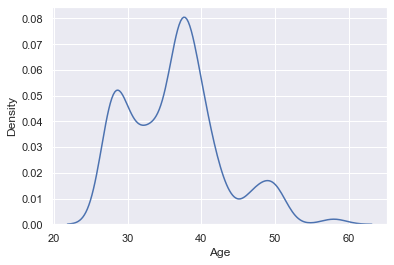

In [57]:
sns.kdeplot(new_date_modified["Age"])

In [58]:
new_date_modified["Age"].value_counts()

38    113
28    113
37     70
40     55
36     49
33     48
30     41
50     35
41     34
34     27
47     24
43     23
31     17
32     13
29      7
27      7
39      7
58      6
48      5
49      5
46      1
Name: Age, dtype: int64

dealing with Daily Work Load Average(in Minutes)

In [59]:
type(new_date_modified["Daily Work Load Average(in Minutes) "])

pandas.core.series.Series

In [60]:
type(new_date_modified["Daily Work Load Average(in Minutes) "][0])

numpy.float64

<AxesSubplot:xlabel='Daily Work Load Average(in Minutes) ', ylabel='Density'>

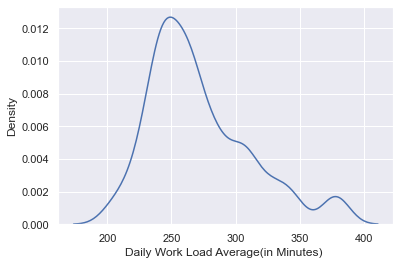

In [61]:
sns.kdeplot(new_date_modified["Daily Work Load Average(in Minutes) "])

dealing with Body Mass Index

In [62]:
type(new_date_modified["Body Mass Index"])

pandas.core.series.Series

In [63]:
type(new_date_modified["Body Mass Index"][0])

numpy.int64

<AxesSubplot:xlabel='Body Mass Index', ylabel='Density'>

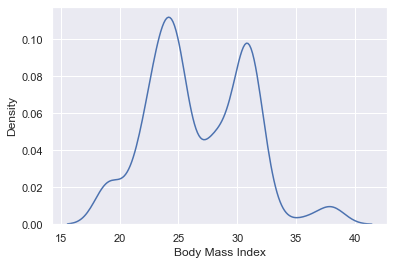

In [64]:
sns.kdeplot(new_date_modified["Body Mass Index"])

dealing with Education

In [65]:
type(new_date_modified["Education"])

pandas.core.series.Series

In [66]:
type(new_date_modified["Education"][0])

numpy.int64

In [67]:
new_date_modified["Education"].unique()

array([1, 3, 2, 4], dtype=int64)

In [68]:
new_date_modified["Education"].value_counts()

1    583
3     73
2     40
4      4
Name: Education, dtype: int64

In [69]:
new_date_modified["Education"]=new_date_modified["Education"].map({1:0 , 2:1 , 3:1 , 4:1})

In [70]:
type(new_date_modified["Education"][0])

numpy.int64

In [71]:
new_date_modified["Education"].unique()

array([0, 1], dtype=int64)

check point

In [72]:
df_preprocessed=new_date_modified.copy()
df_preprocessed.head()

reason1  reason2  reason3  reason4  date_month  date_day  \
0        0        0        0        1           7         5   
1        1        0        0        0           7         5   
2        0        0        0        1           7         6   
3        1        0        0        0           7         0   
4        0        0        0        1           7         0   

   Transportation Expense  Distance to Work  Age  \
0                     289                36   33   
1                     118                13   50   
2                     179                51   38   
3                     279                 5   39   
4                     289                36   33   

   Daily Work Load Average(in Minutes)   Body Mass Index  Education  Children  \
0                               239.554               30          0         2   
1                               239.554               31          0         1   
2                               239.554               31          0         0   
3                               239.554               24          0         2   
4                               239.554               30          0         2   

   Pets  Absenteeism Time in Hours  
0     1                          4  
1     0                          0  
2     0                          2  
3     0                          4  
4     1                          2

# code for  exporting our dataset

In [73]:
#df_preprocessed.to csv("final_preprocessed_dataset.csv" , index=False)
#if we want to save it in any address
#df_preprocessed.to csv("Drive:/folder_name1/folder_name2/file_name.csv" , index=False)

# machine learning

In [74]:
df_preprocessed["Absenteeism Time in Hours"].median()

3.0

In [75]:
#changing the target to logistic form
#the code is like code map in pandas the diffrence is in pandas it goes to DF but in numpy it give us arraye 
target=np.where(df_preprocessed["Absenteeism Time in Hours"]>df_preprocessed["Absenteeism Time in Hours"].median() ,1 ,0)# more than three(or even 3) equal 1 and the othe amount equal 0
target

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [76]:
df_preprocessed["excessive absentiseem"]=target

In [77]:
df_preprocessed.head()

reason1  reason2  reason3  reason4  date_month  date_day  \
0        0        0        0        1           7         5   
1        1        0        0        0           7         5   
2        0        0        0        1           7         6   
3        1        0        0        0           7         0   
4        0        0        0        1           7         0   

   Transportation Expense  Distance to Work  Age  \
0                     289                36   33   
1                     118                13   50   
2                     179                51   38   
3                     279                 5   39   
4                     289                36   33   

   Daily Work Load Average(in Minutes)   Body Mass Index  Education  Children  \
0                               239.554               30          0         2   
1                               239.554               31          0         1   
2                               239.554               31          0         0   
3                               239.554               24          0         2   
4                               239.554               30          0         2   

   Pets  Absenteeism Time in Hours  excessive absentiseem  
0     1                          4                      1  
1     0                          0                      0  
2     0                          2                      0  
3     0                          4                      1  
4     1                          2                      0

In [78]:
df_preprocessed=df_preprocessed.drop(["Absenteeism Time in Hours"] , axis=1)
df_preprocessed.head()

reason1  reason2  reason3  reason4  date_month  date_day  \
0        0        0        0        1           7         5   
1        1        0        0        0           7         5   
2        0        0        0        1           7         6   
3        1        0        0        0           7         0   
4        0        0        0        1           7         0   

   Transportation Expense  Distance to Work  Age  \
0                     289                36   33   
1                     118                13   50   
2                     179                51   38   
3                     279                 5   39   
4                     289                36   33   

   Daily Work Load Average(in Minutes)   Body Mass Index  Education  Children  \
0                               239.554               30          0         2   
1                               239.554               31          0         1   
2                               239.554               31          0         0   
3                               239.554               24          0         2   
4                               239.554               30          0         2   

   Pets  excessive absentiseem  
0     1                      1  
1     0                      0  
2     0                      0  
3     0                      1  
4     1                      0

In [79]:
target.sum()/target.shape[0]

0.45571428571428574

check point

In [80]:
df_with_target=df_preprocessed.copy()
df_with_target.head()

reason1  reason2  reason3  reason4  date_month  date_day  \
0        0        0        0        1           7         5   
1        1        0        0        0           7         5   
2        0        0        0        1           7         6   
3        1        0        0        0           7         0   
4        0        0        0        1           7         0   

   Transportation Expense  Distance to Work  Age  \
0                     289                36   33   
1                     118                13   50   
2                     179                51   38   
3                     279                 5   39   
4                     289                36   33   

   Daily Work Load Average(in Minutes)   Body Mass Index  Education  Children  \
0                               239.554               30          0         2   
1                               239.554               31          0         1   
2                               239.554               31          0         0   
3                               239.554               24          0         2   
4                               239.554               30          0         2   

   Pets  excessive absentiseem  
0     1                      1  
1     0                      0  
2     0                      0  
3     0                      1  
4     1                      0

# defining our inputs

In [81]:
df_with_target.shape

(700, 15)

In [82]:
#pandas cod for slicing the DF
#DF.iloc[row indics , column indicts]
df_with_target.iloc[:,:14]
#df_with_target.iloc[:,:-1]

reason1  reason2  reason3  reason4  date_month  date_day  \
0          0        0        0        1           7         5   
1          1        0        0        0           7         5   
2          0        0        0        1           7         6   
3          1        0        0        0           7         0   
4          0        0        0        1           7         0   
5          0        0        0        1           7         1   
6          0        0        1        0           7         1   
7          0        0        0        1           7         1   
8          0        0        1        0           7         4   
9          0        0        1        0           7         4   
10         1        0        0        0           7         4   
11         1        0        0        0           7         5   
12         1        0        0        0           7         6   
13         1        0        0        0           7         6   
14         0        0        0        1           7         6   
15         1        0        0        0           7         1   
16         0        0        0        1           7         1   
17         0        0        1        0           7         4   
18         1        0        0        0           7         0   
19         0        0        0        1           8         6   
20         1        0        0        0           8         6   
21         1        0        0        0           8         4   
22         1        0        0        0           8         4   
23         0        0        0        1           8         1   
24         0        0        1        0           8         4   
25         0        0        0        1           8         4   
26         0        0        0        1           8         5   
27         0        0        0        1           8         6   
28         0        0        1        0           8         6   
29         0        0        0        1           8         1   
30         0        0        1        0           8         4   
31         0        0        1        0           8         0   
32         0        0        0        1           8         0   
33         0        0        1        0           8         4   
34         0        0        0        1           8         4   
35         0        0        0        1           8         4   
36         0        0        0        1           8         5   
37         1        0        0        0           8         0   
38         0        0        0        1           8         1   
39         0        0        0        1           8         1   
40         0        0        0        1           9         5   
41         0        0        0        1           9         4   
42         0        0        0        1           9         5   
43         0        0        1        0           9         5   
44         0        0        0        1           9         6   
45         0        0        0        1           9         3   
46         0        0        0        1           9         4   
47         0        0        0        1           9         0   
48         0        0        1        0           9         1   
49         1        0        0        0           9         4   
50         1        0        0        0           9         4   
51         1        0        0        0           9         4   
52         0        0        0        1           9         5   
53         0        0        0        1           9         5   
54         1        0        0        0           9         5   
55         1        0        0        0           9         5   
56         0        0        1        0           9         6   
57         0        0        0        1           9         6   
58         1        0        0        0           9         6   
59         0        0        0        1           9         1   
60         0        0        0        1 

In [83]:
#unscaled_inputs=df_with_target.iloc[:,:df_with_target.shape[1]]
unscaled_inputs=df_with_target.iloc[:,:14]
unscaled_inputs

reason1  reason2  reason3  reason4  date_month  date_day  \
0          0        0        0        1           7         5   
1          1        0        0        0           7         5   
2          0        0        0        1           7         6   
3          1        0        0        0           7         0   
4          0        0        0        1           7         0   
5          0        0        0        1           7         1   
6          0        0        1        0           7         1   
7          0        0        0        1           7         1   
8          0        0        1        0           7         4   
9          0        0        1        0           7         4   
10         1        0        0        0           7         4   
11         1        0        0        0           7         5   
12         1        0        0        0           7         6   
13         1        0        0        0           7         6   
14         0        0        0        1           7         6   
15         1        0        0        0           7         1   
16         0        0        0        1           7         1   
17         0        0        1        0           7         4   
18         1        0        0        0           7         0   
19         0        0        0        1           8         6   
20         1        0        0        0           8         6   
21         1        0        0        0           8         4   
22         1        0        0        0           8         4   
23         0        0        0        1           8         1   
24         0        0        1        0           8         4   
25         0        0        0        1           8         4   
26         0        0        0        1           8         5   
27         0        0        0        1           8         6   
28         0        0        1        0           8         6   
29         0        0        0        1           8         1   
30         0        0        1        0           8         4   
31         0        0        1        0           8         0   
32         0        0        0        1           8         0   
33         0        0        1        0           8         4   
34         0        0        0        1           8         4   
35         0        0        0        1           8         4   
36         0        0        0        1           8         5   
37         1        0        0        0           8         0   
38         0        0        0        1           8         1   
39         0        0        0        1           8         1   
40         0        0        0        1           9         5   
41         0        0        0        1           9         4   
42         0        0        0        1           9         5   
43         0        0        1        0           9         5   
44         0        0        0        1           9         6   
45         0        0        0        1           9         3   
46         0        0        0        1           9         4   
47         0        0        0        1           9         0   
48         0        0        1        0           9         1   
49         1        0        0        0           9         4   
50         1        0        0        0           9         4   
51         1        0        0        0           9         4   
52         0        0        0        1           9         5   
53         0        0        0        1           9         5   
54         1        0        0        0           9         5   
55         1        0        0        0           9         5   
56         0        0        1        0           9         6   
57         0        0        0        1           9         6   
58         1        0        0        0           9         6   
59         0        0        0        1           9         1   
60         0        0        0        1 

# standardizing process

In [84]:
#importing the library
from sklearn.preprocessing import StandardScaler

In [85]:
#we standardizing all inputs
absenteeism_scaler=StandardScaler()
absenteeism_scaler.fit(unscaled_inputs)
scaled_inputs=absenteeism_scaler.transform(unscaled_inputs)
scaled_inputs

array([[-0.66134081, -0.09298136, -0.39626354, ..., -0.44798003,
         0.88046927,  0.26848661],
       [ 1.51207969, -0.09298136, -0.39626354, ..., -0.44798003,
        -0.01928035, -0.58968976],
       [-0.66134081, -0.09298136, -0.39626354, ..., -0.44798003,
        -0.91902997, -0.58968976],
       ...,
       [ 1.51207969, -0.09298136, -0.39626354, ...,  2.23224237,
        -0.91902997, -0.58968976],
       [-0.66134081, -0.09298136, -0.39626354, ...,  2.23224237,
        -0.91902997, -0.58968976],
       [-0.66134081, -0.09298136, -0.39626354, ..., -0.44798003,
        -0.01928035,  0.26848661]])

# splitting our dataset to train and test

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train , x_test , y_train ,y_test=train_test_split(scaled_inputs , target , test_size=0.2 , random_state=40)

In [88]:
x_train.shape , x_test.shape

((560, 14), (140, 14))

# logistic regression

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
reg= LogisticRegression()
reg.fit(x_train ,y_train)

LogisticRegression()

In [91]:
# training accuracy
reg.score(x_train , y_train)

0.7410714285714286

# manually checking the accuracy

In [92]:
#predicting class labels (this is our machine learning predictions )
model_outputs=reg.predict(x_train)
model_outputs

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,

In [93]:
#our real target(train)
y_train

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,

In [94]:
#compairing the real ones with predictions(True=maches ,False=unmathes)
model_outputs==y_train

array([ True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True, False,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False, False,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True, False,  True,
        True, False, False, False,  True,  True, False,  True, False,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,

In [95]:
#total y_train=560 and maches ones=415
np.sum(model_outputs==y_train)

415

In [96]:
# train accuracy
np.sum(model_outputs==y_train)/model_outputs.shape[0]

0.7410714285714286

# creating a summary table

In [97]:
#Width from the origin bias
reg.intercept_

array([-0.14859772])

In [98]:
#slope
reg.coef_

array([[ 0.22087279, -0.08674694,  0.60608716, -0.60561914,  0.02105397,
         0.03520846,  0.32965656, -0.0258872 , -0.27732683, -0.07415643,
         0.13232229, -0.06783676,  0.31247906, -0.39454994]])

In [99]:
#scaled_inputs is array so we cant get columns(scaler(sklearn make all things array))
unscaled_inputs.columns.values

array(['reason1', 'reason2', 'reason3', 'reason4', 'date_month',
       'date_day', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average(in Minutes) ', 'Body Mass Index',
       'Education', 'Children', 'Pets'], dtype=object)

In [100]:
feature_names=unscaled_inputs.columns.values

In [101]:
summary_table=pd.DataFrame(columns=["feature_names"] , data=feature_names)

In [102]:
#arrays are horizintal or they are rows so for changing it to be columns we use transpose in mathematic
summary_table["coefitions"]=np.transpose(reg.coef_)

In [103]:
summary_table

feature_names  coefitions
0                                reason1    0.220873
1                                reason2   -0.086747
2                                reason3    0.606087
3                                reason4   -0.605619
4                             date_month    0.021054
5                               date_day    0.035208
6                 Transportation Expense    0.329657
7                       Distance to Work   -0.025887
8                                    Age   -0.277327
9   Daily Work Load Average(in Minutes)    -0.074156
10                       Body Mass Index    0.132322
11                             Education   -0.067837
12                              Children    0.312479
13                                  Pets   -0.394550

In [104]:
summary_table.index=summary_table.index+1
summary_table

feature_names  coefitions
1                                reason1    0.220873
2                                reason2   -0.086747
3                                reason3    0.606087
4                                reason4   -0.605619
5                             date_month    0.021054
6                               date_day    0.035208
7                 Transportation Expense    0.329657
8                       Distance to Work   -0.025887
9                                    Age   -0.277327
10  Daily Work Load Average(in Minutes)    -0.074156
11                       Body Mass Index    0.132322
12                             Education   -0.067837
13                              Children    0.312479
14                                  Pets   -0.394550

In [105]:
summary_table.loc[0]=["intercept" , reg.intercept_[0]]#reg.intecept_[0] getting out of array and make it be number
summary_table

feature_names  coefitions
1                                reason1    0.220873
2                                reason2   -0.086747
3                                reason3    0.606087
4                                reason4   -0.605619
5                             date_month    0.021054
6                               date_day    0.035208
7                 Transportation Expense    0.329657
8                       Distance to Work   -0.025887
9                                    Age   -0.277327
10  Daily Work Load Average(in Minutes)    -0.074156
11                       Body Mass Index    0.132322
12                             Education   -0.067837
13                              Children    0.312479
14                                  Pets   -0.394550
0                              intercept   -0.148598

In [106]:
summary_table=summary_table.sort_index()
summary_table

feature_names  coefitions
0                              intercept   -0.148598
1                                reason1    0.220873
2                                reason2   -0.086747
3                                reason3    0.606087
4                                reason4   -0.605619
5                             date_month    0.021054
6                               date_day    0.035208
7                 Transportation Expense    0.329657
8                       Distance to Work   -0.025887
9                                    Age   -0.277327
10  Daily Work Load Average(in Minutes)    -0.074156
11                       Body Mass Index    0.132322
12                             Education   -0.067837
13                              Children    0.312479
14                                  Pets   -0.394550